# Project:- Airbnb Data Analytics
Project Summary:
This project analyzes Airbnb listings using Python to identify key factors affecting pricing and customer satisfaction. It employs K-Nearest Neighbors (KNN) and Linear Regression for price prediction and Logistic Regression to classify listings as affordable or expensive. Data preprocessing, visualization, and machine learning techniques provide insights into booking trends, host earnings, and location-based pricing. The findings help optimize pricing strategies for hosts and improve decision-making for guests.

Student Name:- Santosh Shelke

### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Mr.Santy\OneDrive\Desktop\airbnb project\Airbnb data.csv")
df.head(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [3]:
#check null values 
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [4]:
df.shape

(18723, 20)

In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

## Data Cleaning & Preprocessing

In [6]:
# Drop columns only if they exist

df.drop(columns=['country', 'borough', 'bathrooms', 'minstay'], inplace=True, errors='ignore')


In [7]:
df.head(4)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...


In [8]:
# Handle missing values
df.dropna(subset=['price', 'bedrooms'], inplace=True)

In [9]:
df

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,17789893,1476,47501089,Private room,Amsterdam,Bijlmer Centrum,10,5.0,3,1.0,32.0,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,1476,67093870,Private room,Amsterdam,Bijlmer Centrum,6,5.0,4,1.0,24.0,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,19859427,1476,29724632,Private room,Amsterdam,Geuzenveld / Slotermeer,0,0.0,1,1.0,38.0,Private single room,2017-07-22 16:05:14.149610,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18721,17132164,1476,115156569,Private room,Amsterdam,Centrum West,13,4.5,2,1.0,36.0,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...


In [10]:
# Convert categorical to numerical where needed
df = pd.get_dummies(df, columns=['room_type', 'neighborhood'], drop_first=True)

In [11]:
df.head(4)

,room_id,survey_id,host_id,city,reviews,overall_satisfaction,accommodates,bedrooms,price,name,...,neighborhood_Noord West,neighborhood_Noord-West / Noord-Midden,neighborhood_Oostelijk Havengebied / Indische Buurt,neighborhood_Osdorp,neighborhood_Oud Noord,neighborhood_Oud Oost,neighborhood_Slotervaart,neighborhood_Watergraafsmeer,neighborhood_Westerpark,neighborhood_Westpoort
0,10176931,1476,49180562,Amsterdam,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),...,False,False,False,False,False,False,False,False,False,False
1,8935871,1476,46718394,Amsterdam,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,...,False,False,False,False,False,False,False,False,False,False
2,14011697,1476,10346595,Amsterdam,1,0.0,3,1.0,132.0,Amsterdam,...,False,False,False,False,False,False,False,True,False,False
3,6137978,1476,8685430,Amsterdam,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,...,False,False,False,False,False,False,False,False,False,False


In [12]:

# Display cleaned data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   room_id                                              18723 non-null  int64  
 1   survey_id                                            18723 non-null  int64  
 2   host_id                                              18723 non-null  int64  
 3   city                                                 18723 non-null  object 
 4   reviews                                              18723 non-null  int64  
 5   overall_satisfaction                                 18723 non-null  float64
 6   accommodates                                         18723 non-null  int64  
 7   bedrooms                                             18723 non-null  float64
 8   price                                                18723 non-nul

## Exploratory Data Analysis (EDA)

In [13]:
df.describe()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,16.741548,3.301127,2.922021,1.430380,166.599477,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,33.522630,2.213558,1.327524,0.879019,108.943849,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,532.000000,5.000000,17.000000,10.000000,6000.000000,52.424980,5.027689


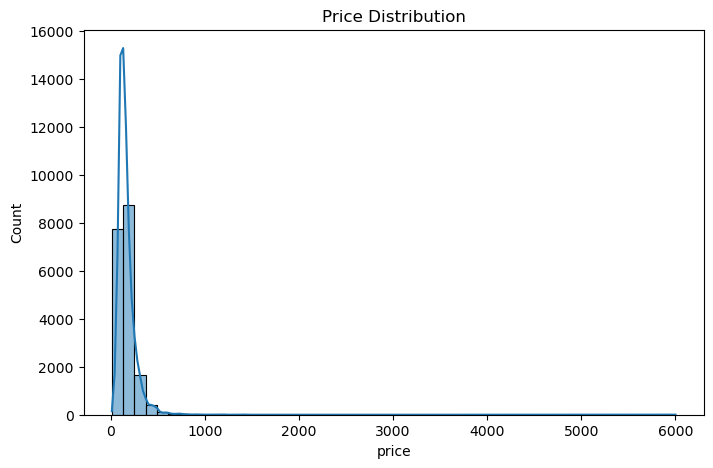

In [14]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

Text(0.5, 1.0, 'Price vs. Accommodates')

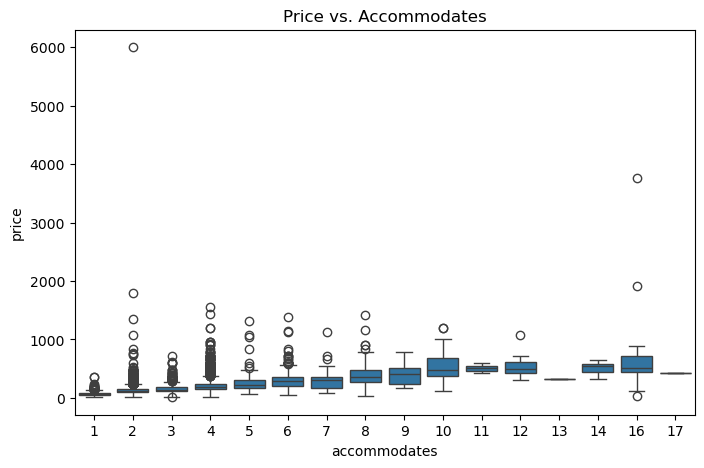

In [15]:

# Price vs. Accommodates
plt.figure(figsize=(8, 5))
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('Price vs. Accommodates')

In [16]:
plt.show()

## Applying K-Nearest Neighbors (KNN) for Price Prediction

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
features = ['accommodates', 'bedrooms', 'reviews', 'overall_satisfaction']
X = df[features]  # Independent variables
y = df['price']   # Dependent variable


In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Training KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 54.78606141522029
Mean Squared Error: 8377.64679305741
R2 Score: 0.1816905481652552


In [37]:
# Selecting features and target variable
features = ['accommodates', 'bedrooms', 'reviews', 'overall_satisfaction']
X = df[features]
y = df['price']

## Applying Linear Regression for Price Prediction

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
# Predictions
y_pred_lr = lin_reg.predict(X_test_scaled)

In [51]:
# Model evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [52]:
print(f"Linear Regression - Mean Absolute Error: {mae_lr}")
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

Linear Regression - Mean Absolute Error: 50.167556820860156
Linear Regression - Mean Squared Error: 7039.796573203175
Linear Regression - R2 Score: 0.31236870959755103


## Applying Logistic Regression for Price Classification

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [54]:
# Create a binary price category: 1 for expensive (above median), 0 for affordable
df['price_category'] = (df['price'] > df['price'].median()).astype(int)

In [55]:
# Define new target variable
y_class = df['price_category']

In [56]:
# Splitting data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [57]:
# Standardizing the features
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)


In [58]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_class_scaled, y_train_class)

LogisticRegression()

In [59]:
# Predictions
y_pred_log = log_reg.predict(X_test_class_scaled)


In [60]:

# Model evaluation
accuracy = accuracy_score(y_test_class, y_pred_log)
print(f"Logistic Regression - Accuracy: {accuracy}")
print("Classification Report:", classification_report(y_test_class, y_pred_log))

Logistic Regression - Accuracy: 0.7311081441922563
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1958
           1       0.76      0.63      0.69      1787

    accuracy                           0.73      3745
   macro avg       0.74      0.73      0.73      3745
weighted avg       0.74      0.73      0.73      3745

